# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [177]:
#Align text to the left
def left_align(df):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [ dict(selector='th', props=[('text-align', 'left')] ) ])
    
    return left_aligned_df

## Generate Cities List

In [154]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
cities

['port elizabeth',
 'matara',
 'rikitea',
 'yanan',
 'hobart',
 'atar',
 'xinzhou',
 'meyungs',
 'mahendranagar',
 'riyadh',
 'kefamenanu',
 'kavieng',
 'talladega',
 'qaanaaq',
 'fort-shevchenko',
 'hermanus',
 'kodiak',
 'chagda',
 'ushuaia',
 'paramonga',
 'hervey bay',
 'walvis bay',
 'arraial do cabo',
 'vaini',
 'hilo',
 'aden',
 'ketchikan',
 'castrovillari',
 'kapaa',
 'kulhudhuffushi',
 'jamestown',
 'auki',
 'yar-sale',
 'saleaula',
 'pangnirtung',
 'bengkulu',
 'avarua',
 'voznesenka',
 'oranjemund',
 'bredasdorp',
 'saint-joseph',
 'bethel',
 'whitianga',
 'cheyenne',
 'busselton',
 'kahului',
 'narsaq',
 'plettenberg bay',
 'ponta do sol',
 'leshukonskoye',
 'grand river south east',
 'puerto ayora',
 'morgan city',
 'carnarvon',
 'funtua',
 'golkoy',
 'faanui',
 'fort nelson',
 'olga',
 'ankazoabo',
 'yellowknife',
 'tuktoyaktuk',
 'egvekinot',
 'bluff',
 'tunggol',
 'dicabisagan',
 'fairbanks',
 'staraya poltavka',
 'doha',
 'butaritari',
 'yeppoon',
 'halalo',
 'flin fl

### Perform API Calls

In [155]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
temp_unit = 'imperial'
citynumb = 1
setnumb = 1
city_n = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date_w = []

for city in cities:
    url_query = (f"{url}appid={weather_api_key}&q={city}&units={temp_unit}")
    weather_response = requests.get(url_query)
    weather_json = weather_response.json()
    
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date_w.append(weather_json['dt'])
        city_n.append(city)
        print(f"Processing Record {citynumb} of Set {setnumb} | {city}")
        citynumb += 1
        
        if citynumb == 50:
            setnumb += 1 
            citynumb = 1
    except:
        print('City' + '\033[1m' + ' not ' + '\033[0m' + 'found. Skipping...')
        #pass

Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | matara
Processing Record 3 of Set 1 | rikitea
City not found. Skipping...
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | atar
Processing Record 6 of Set 1 | xinzhou
City not found. Skipping...
Processing Record 7 of Set 1 | mahendranagar
Processing Record 8 of Set 1 | riyadh
Processing Record 9 of Set 1 | kefamenanu
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | talladega
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | fort-shevchenko
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | kodiak
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | paramonga
Processing Record 18 of Set 1 | hervey bay
Processing Record 19 of Set 1 | walvis bay
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | hilo
Processing Rec

Processing Record 37 of Set 4 | geraldton
Processing Record 38 of Set 4 | sakakah
Processing Record 39 of Set 4 | abha
City not found. Skipping...
Processing Record 40 of Set 4 | barra
Processing Record 41 of Set 4 | lagos
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | wanning
Processing Record 44 of Set 4 | libertador general san martin
Processing Record 45 of Set 4 | calbuco
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | diamantina
Processing Record 49 of Set 4 | pevek
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | naze
Processing Record 5 of Set 5 | mazyr
Processing Record 6 of Set 5 | bantry
Processing Record 7 of Set 5 | nassjo
Processing Record 8 of Set 5 | saint george
Processing Record 9 of Set 5 | cerna hora
Processing Record 10 of Set 5 | touros
Processing Record 11 of Set 5 | winchester

Processing Record 31 of Set 8 | kampot
Processing Record 32 of Set 8 | tuatapere
Processing Record 33 of Set 8 | treinta y tres
Processing Record 34 of Set 8 | juarez
Processing Record 35 of Set 8 | plunge
City not found. Skipping...
Processing Record 36 of Set 8 | huron
Processing Record 37 of Set 8 | nizhniy kuranakh
Processing Record 38 of Set 8 | bilibino
Processing Record 39 of Set 8 | breyten
Processing Record 40 of Set 8 | banon
Processing Record 41 of Set 8 | vaitape
Processing Record 42 of Set 8 | los llanos de aridane
Processing Record 43 of Set 8 | illela
Processing Record 44 of Set 8 | lasa
Processing Record 45 of Set 8 | mareeba
Processing Record 46 of Set 8 | caravelas
Processing Record 47 of Set 8 | kadipaten
Processing Record 48 of Set 8 | sarangani
Processing Record 49 of Set 8 | myre
Processing Record 1 of Set 9 | quatre cocos
Processing Record 2 of Set 9 | amalapuram
Processing Record 3 of Set 9 | portland
Processing Record 4 of Set 9 | xuddur
Processing Record 5 of 

Processing Record 26 of Set 12 | suoyarvi
City not found. Skipping...
Processing Record 27 of Set 12 | morant bay
Processing Record 28 of Set 12 | kirkland lake
City not found. Skipping...
Processing Record 29 of Set 12 | moroni
Processing Record 30 of Set 12 | axim
Processing Record 31 of Set 12 | luganville
Processing Record 32 of Set 12 | alyangula
Processing Record 33 of Set 12 | perelyub
Processing Record 34 of Set 12 | lorengau
Processing Record 35 of Set 12 | redwater
Processing Record 36 of Set 12 | zupanja
Processing Record 37 of Set 12 | koslan
City not found. Skipping...
Processing Record 38 of Set 12 | arman
Processing Record 39 of Set 12 | sri aman
Processing Record 40 of Set 12 | nishihara
Processing Record 41 of Set 12 | namatanai
Processing Record 42 of Set 12 | san cristobal
Processing Record 43 of Set 12 | itarema
Processing Record 44 of Set 12 | malanje
Processing Record 45 of Set 12 | oume
Processing Record 46 of Set 12 | urumqi
City not found. Skipping...
Processin

### Convert Raw Data to DataFrame

In [180]:
#Create DataFrame with extracted data.
cities_df = pd.DataFrame({'City':city_n, 'Latitude':lat, 'Longitude':lng, 'Max Temp (F)':max_temp, 'Humidity (%)':humidity,
                          'Cloudiness (%)':cloud, 'Wind Speed (mph)':wind_speed, 'Country':country, 'Date':date_w})
cities_df['City'] = cities_df['City'].str.capitalize()
left_align(cities_df.head(20))

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Port elizabeth,-33.918000,25.570100,66.200000,94,90,6.910000,ZA,1612731246
1,Matara,5.948500,80.535300,74.190000,90,0,4.270000,LK,1612731280
2,Rikitea,-23.120300,-134.969200,77.400000,73,97,13.040000,PF,1612731506
3,Hobart,-42.879400,147.329400,55.400000,58,40,13.800000,AU,1612730869
4,Atar,20.516900,-13.049900,61.970000,32,0,9.510000,MR,1612731506
5,Xinzhou,38.409200,112.733300,26.650000,82,0,1.010000,CN,1612731506
6,Mahendranagar,28.916700,80.333300,55.040000,53,0,4.210000,NP,1612731506
7,Riyadh,24.687700,46.721900,59.000000,58,0,11.500000,SA,1612730837
8,Kefamenanu,-9.446700,124.478100,70.160000,88,100,2.010000,ID,1612731507
9,Kavieng,-2.574400,150.796700,83.370000,72,75,7.780000,PG,1612731507


### Export Data Frame in a csv file

In [184]:
cities_df.to_csv(output_data_file, index=False, header=True)

## Filtered Data based on Humidity percentage exceeding 100%

In [185]:
clean_cities_df = cities_df[(cities_df['Humidity (%)'] <= 100)]

if cities_df['City'].count() == clean_cities_df['City'].count():
    print('No cities found where humidity level exceeded 100%')
else:
    print('Some cities where humidity level were found and removed from Data Frame')

No cities found where humidity level exceeded 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [161]:
#Built in function to create scatter plots
def scatter_only(x_axis, y_axis):
    #First argument is x axis and second is y axis.
    #Scatter Plot
    plt.scatter(x_axis, y_axis, marker="o", facecolors='red', edgecolors="black")
    plt.title(f"{y_axis.name} vs. {x_axis.name} Plot")
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)

## Latitude vs. Temperature Plot

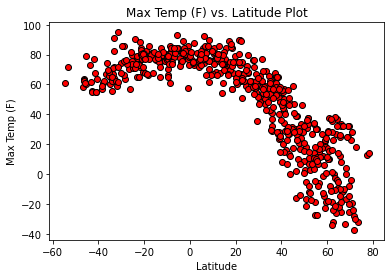

In [162]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Max Temp (F)'])

## Latitude vs. Humidity Plot

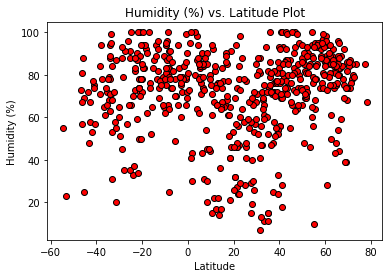

In [163]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Humidity (%)'])


## Latitude vs. Cloudiness Plot

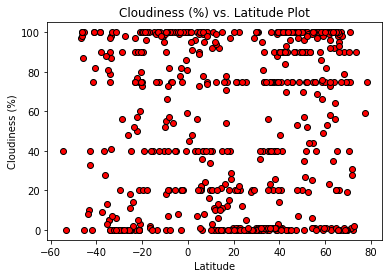

In [164]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Cloudiness (%)'])

## Latitude vs. Wind Speed Plot

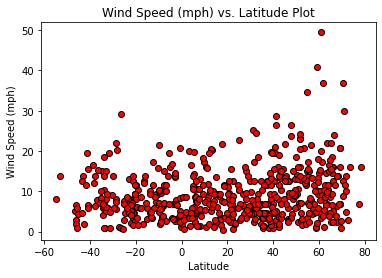

In [165]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Wind Speed (mph)'])

## Linear Regression

In [166]:
#Create two Data Frames based on Northern and Southern Hemisphere
northern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] >= 0)]
southern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] < 0)]
southern_hemisphere_cities_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,port elizabeth,-33.9180,25.5701,66.20,94,90,6.91,ZA,1612731246
2,rikitea,-23.1203,-134.9692,77.40,73,97,13.04,PF,1612731506
3,hobart,-42.8794,147.3294,55.40,58,40,13.80,AU,1612730869
8,kefamenanu,-9.4467,124.4781,70.16,88,100,2.01,ID,1612731507
9,kavieng,-2.5744,150.7967,83.37,72,75,7.78,PG,1612731507


In [167]:
#Built in function to create scatter plot and linear regression
def scatter_linear(x_axis, y_axis, a, b):
    #First argument is x axis, second is y axis, third one is to determine color and fourth to determine hemisphere.
    #Scatter Plot
    hemisphere = ['Northern Hemisphere ', 'Southern Hemisphere ']
    colors = ['lightblue', 'lightgreen']
    plt.scatter(x_axis, y_axis, marker="o", facecolors=colors[a], edgecolors="black")
    plt.title(f"{hemisphere[b]} ({y_axis.name} vs. {x_axis.name} Linear Regression)")
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)

    #Linear Regression
    x = ((x_axis.mean())-5)
    y = y_axis.min()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

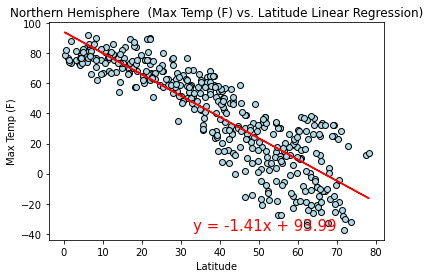

In [168]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Max Temp (F)'], 0, 0)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

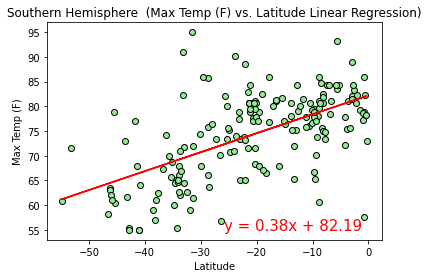

In [169]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Max Temp (F)'], 1, 1)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

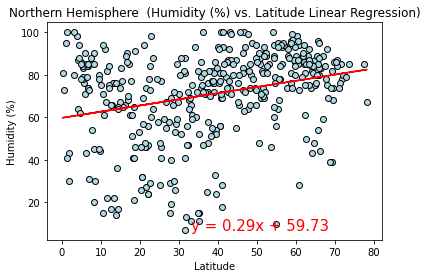

In [170]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Humidity (%)'], 0, 0)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

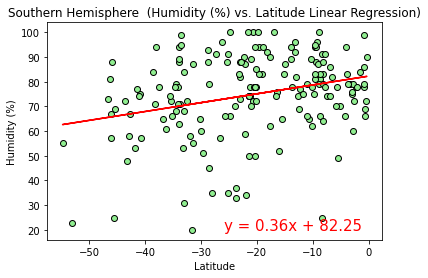

In [171]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Humidity (%)'], 1, 1)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

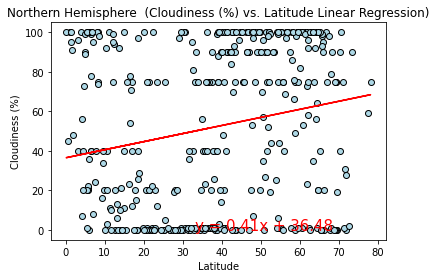

In [172]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Cloudiness (%)'], 0, 0)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

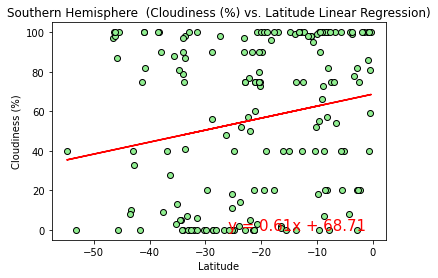

In [173]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Cloudiness (%)'], 1, 1)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

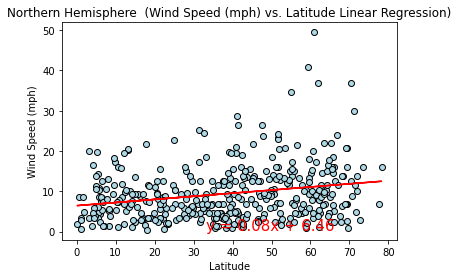

In [174]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Wind Speed (mph)'], 0, 0)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

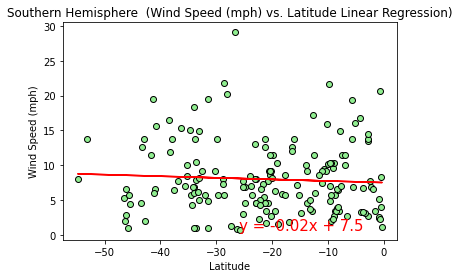

In [175]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Wind Speed (mph)'], 1, 1)